# Plots =phenotype ^ !=t Sofia 14/06/2022 

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle5 as pickle
import seaborn as sns

In [252]:
## Read all the files:
dir_input='/SSD/home/sofia/retina-phenotypes/complementary/traits_different_time_points/results/' #to modify
dir_output='/SSD/home/sofia/retina-phenotypes/complementary/traits_different_time_points/results/'
figsize_1=7
figsize_2=5
font_size=8
axes_titlesize=12
axes_labelsize=12
l_legends = ['N_bif', 'phi', 'tau', 'tva', 'taa', 'r_phi', 'r_tau']
##

df_N_bif_left = pd.read_csv(dir_input+ 'bifurcations_left_QC.csv')
df_N_bif_right = pd.read_csv(dir_input+ 'bifurcations_right_QC.csv')

df_medianDiameter_all_left = pd.read_csv(dir_input+ 'medianDiameter_all_left_QC.csv')
df_medianDiameter_all_right = pd.read_csv(dir_input+ 'medianDiameter_all_right_QC.csv')

df_DF_all_left = pd.read_csv(dir_input+ 'DF_all_left_QC.csv')
df_DF_all_right = pd.read_csv(dir_input+ 'DF_all_right_QC.csv')

df_D_ratio_left = pd.read_csv(dir_input+ 'ratio_AV_medianDiameter_left_QC.csv')
df_D_ratio_right = pd.read_csv(dir_input+ 'ratio_AV_medianDiameter_right_QC.csv')

df_DF_ratio_left = pd.read_csv(dir_input+ 'ratio_AV_DF_left_QC.csv')
df_DF_ratio_right = pd.read_csv(dir_input+ 'ratio_AV_DF_right_QC.csv')

df_tVA_left = pd.read_csv(dir_input+ 'mean_angle_tva_left_QC.csv')
df_tVA_right = pd.read_csv(dir_input+ 'mean_angle_tva_right_QC.csv')

df_tAA_left = pd.read_csv(dir_input+ 'mean_angle_taa_left_QC.csv')
df_tAA_right = pd.read_csv(dir_input+ 'mean_angle_taa_right_QC.csv')

df_FD_all_left = pd.read_csv(dir_input+ 'slope_left_QC.csv', sep=',')
df_FD_all_right = pd.read_csv(dir_input+ 'slope_right_QC.csv' , sep=',')

df_VD_orig_all_left = pd.read_csv(dir_input+ 'VD_orig_all_left_QC.csv', sep=',')
df_VD_orig_all_right = pd.read_csv(dir_input+ 'VD_orig_all_right_QC.csv' , sep=',')

### Different time points:

In [253]:
def prepare_data_for_plot(df_N_bif_, df_medianDiameter_all_, df_DF_all_, df_tVA_, df_tAA_, df_D_Ratio_, df_DF_ratio_,type):
    y1 = df_N_bif_[type]
    y2 = df_medianDiameter_all_[type]
    y3 = df_DF_all_[type]
    y4 = df_tVA_[type]
    y5 = df_tAA_[type]
    y6 = df_D_Ratio_[type]
    y7 = df_DF_ratio_[type]
    return y1,y2,y3,y4,y5,y6,y7

def plot_hist_time_dif(y1_R, y2_R, y3_R, y4_R, y5_R, y6R, y7R, y1_L,y2_L,y3_L,y4_L,y5_L,y6_L,y7_L, title):
    ### Step histograms
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(figsize_1,figsize_2)
    sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":axes_titlesize,"axes.labelsize":axes_labelsize})
    bins = 30
    axs[0].hist([y1_R, y2_R, y3_R, y4_R, y5_R,y6_R, y7_R], bins, label=l_legends, alpha=1, histtype='step')
    axs[0].set_title('Right eye')
    axs[0].legend(loc='upper right')
    axs[1].hist([y1_L,y2_L,y3_L,y4_L,y5_L,y6_L,y7_L], bins, label=l_legends, alpha=1, histtype='step')
    axs[1].set_title('Left eye')
    axs[1].legend(loc='upper right')
    fig.tight_layout()
    plt.savefig(dir_output +'/Different_time_points_' + str(title)+'_hist.pdf',
               facecolor=fig.get_facecolor(), edgecolor='none')
    plt.show()
    plt.close()

def plot_density_time_dif(y1_R, y2_R, y3_R, y4_R, y5_R, y6R, y7R, y1_L,y2_L,y3_L,y4_L,y5_L,y6_L,y7_L, title):
    ### Density plots
    if title=='00_menos_10':
        xlabel_name='t0 - t1'
    else:
        xlabel_name='|t0 - t1|'

    fig, axs = plt.subplots(2,2,figsize=(figsize_1,figsize_2))
    plt.rcParams['font.size'] = font_size
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":axes_titlesize,"axes.labelsize":axes_labelsize})
    fig = sns.kdeplot(y1_R, shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(y2_R, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    ig = sns.kdeplot(y3_R, shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(y4_R, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(y5_R, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(y6_R, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(y7_R, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    plt.legend(l_legends)
    plt.title('Right eye')
    plt.xlabel(xlabel_name)

    plt.subplot(1, 2, 2) # index 2
    sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":axes_titlesize,"axes.labelsize":axes_labelsize})
    fig = sns.kdeplot(y1_L, shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(y2_L, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(y3_L, shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(y4_L, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(y5_L, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(y6_L, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(y7_L, shade=True, alpha=0.03,linewidth = 2)#, color="b")
    plt.legend(l_legends)
    plt.title('Left eye')
    plt.xlabel(xlabel_name)
    plt.tight_layout()
    plt.savefig(dir_output+'/Different_time_points_' + str(title)+'_density.pdf',
               facecolor=fig.get_facecolor(), edgecolor='none')
    plt.show()
    plt.close()
    


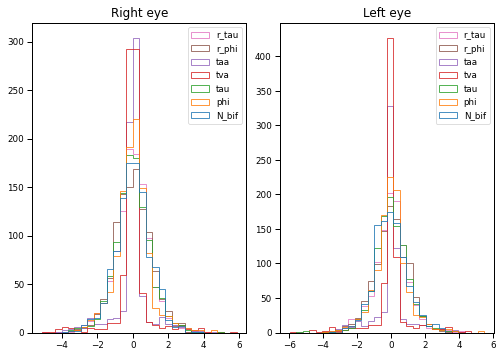

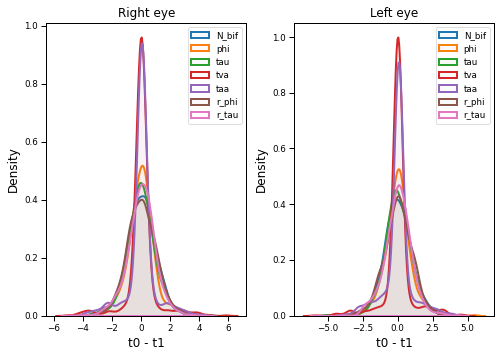

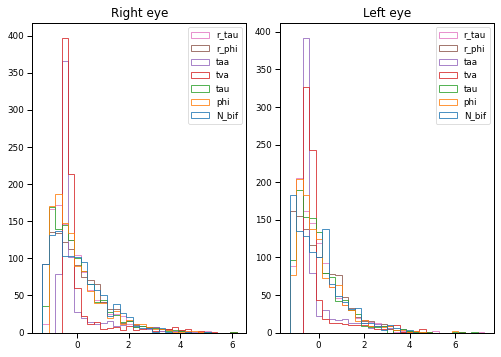

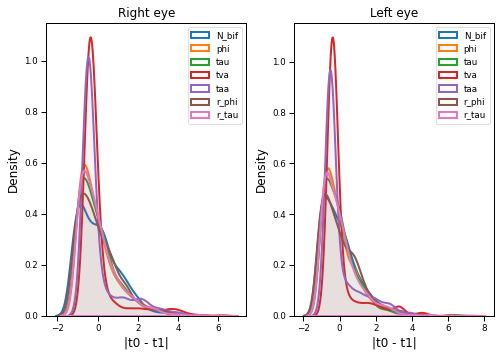

In [254]:
l_types_of_plots=['00_menos_10', 'abs00_menos_10']
for i in range(len(l_types_of_plots)):
    y1_R,y2_R,y3_R,y4_R,y5_R,y6_R,y7_R = prepare_data_for_plot(df_N_bif_right, df_medianDiameter_all_right, df_DF_all_right, df_tVA_right, df_tAA_right,df_D_ratio_right,df_DF_ratio_right, l_types_of_plots[i])
    y1_L,y2_L,y3_L,y4_L,y5_L,y6_L,y7_L = prepare_data_for_plot(df_N_bif_left, df_medianDiameter_all_left, df_DF_all_left, df_tVA_left, df_tAA_left,df_D_ratio_left,df_DF_ratio_left, l_types_of_plots[i])
    plot_hist_time_dif(y1_R,y2_R,y3_R,y4_R,y5_R,y6_R,y7_R,y1_L,y2_L,y3_L,y4_L,y5_L,y6_L,y7_L, l_types_of_plots[i]) 
    plot_density_time_dif(y1_R,y2_R,y3_R,y4_R,y5_R,y6_R,y7_R,y1_L,y2_L,y3_L,y4_L,y5_L,y6_L,y7_L, l_types_of_plots[i])

### Right vs Left

In [255]:
def rename_R_L(df_N_bif_, df_medianDiameter_all_, df_DF_all_, df_tVA_, df_tAA_,df_D_ratio_,df_DF_ratio_, eye):
    df_N_bif_.rename(columns = {'bifurcations_00': 'bifurcations_00_'+eye, 'bifurcations_10': 'bifurcations_10_'+eye}, inplace = True)
    df_medianDiameter_all_.rename(columns = {'medianDiameter_all_00': 'medianDiameter_all_00_'+eye, 'medianDiameter_all_10': 'medianDiameter_all_10_'+eye}, inplace = True)
    df_DF_all_.rename(columns = {'DF_all_00': 'DF_all_00_'+eye, 'DF_all_10': 'DF_all_10_'+eye}, inplace = True)
    df_tVA_.rename(columns = {'mean_angle_tva_00': 'mean_angle_tva_00_'+eye, 'mean_angle_tva_10': 'mean_angle_tva_10_'+eye}, inplace = True)
    df_tAA_.rename(columns = {'mean_angle_taa_00': 'mean_angle_taa_00_'+eye, 'mean_angle_taa_10': 'mean_angle_taa_10_'+eye}, inplace = True)
    df_D_ratio_.rename(columns = {'ratio_AV_medianDiameter_00': 'ratio_AV_medianDiameter_00_'+eye, 'ratio_AV_medianDiameter_10': 'ratio_AV_medianDiameter_10_'+eye}, inplace = True)
    df_DF_ratio_.rename(columns = {'ratio_AV_DF_00': 'ratio_AV_DF_00_'+eye, 'ratio_AV_DF_10': 'ratio_AV_DF_10_'+eye}, inplace = True)
    return df_N_bif_, df_medianDiameter_all_, df_DF_all_, df_tVA_, df_tAA_,df_D_ratio_,df_DF_ratio_


def intersection_R_L(df_right, df_left):
    df_intersection = df_right.merge(df_left, how='inner', on='eid', suffixes=('', '_y'))
    df_intersection.drop(df_intersection.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
    return df_intersection


def compute_substraction(df_intersection, first_value, second_value, name):
    aux = df_intersection[name+first_value] - df_intersection[name+second_value]
    aux=(aux-aux.mean())/aux.std()
    return aux


def prepare_data_for_plot_RL(substractions, instance, list_names):
    plot_dict = {}
    for i in range(len(list_names)):
        plot_dict[f'{instance}{list_names[i]}'] = substractions[instance+list_names[i]]
    return plot_dict

def plot_density_time_dif(plot_dict_00, plot_dict_10, plot_dict_mix):
    ### Density plots ['df_00_N_bif', 'df_00_medianDiameter_all', 'df_00_DF_all', 'df_00_tVA', 'df_00_tAA']
    fig, axs = plt.subplots(2,2,figsize=(figsize_1,figsize_2))
    plt.rcParams['font.size'] = font_size
    sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":axes_titlesize,"axes.labelsize":axes_labelsize})
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    fig = sns.kdeplot(plot_dict_00['df_00_bifurcations'], shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(plot_dict_00['df_00_medianDiameter_all'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    ig = sns.kdeplot(plot_dict_00['df_00_DF_all'], shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(plot_dict_00['df_00_mean_angle_tva'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_00['df_00_mean_angle_taa'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_00['df_00_ratio_AV_DF'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_00['df_00_ratio_AV_medianDiameter'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    plt.legend(l_legends)
    plt.title('R - L at t0')

    plt.subplot(1, 2, 2) # index 2 dict_keys(['df_10_N_bif', 'df_10_medianDiameter_all', 'df_10_DF_all', 'df_10_tVA', 'df_10_tAA'])
    sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":axes_titlesize,"axes.labelsize":axes_labelsize})
    fig = sns.kdeplot(plot_dict_10['df_10_bifurcations'], shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(plot_dict_10['df_10_medianDiameter_all'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_10['df_10_DF_all'], shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(plot_dict_10['df_10_mean_angle_tva'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_10['df_10_mean_angle_taa'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_10['df_10_ratio_AV_medianDiameter'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_10['df_10_ratio_AV_DF'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    plt.legend(l_legends)
    plt.title('R - L at t1')
    plt.tight_layout()
    plt.savefig(dir_output+'/Different_eyes_density.pdf',
               facecolor=fig.get_facecolor(), edgecolor='none')
    plt.show()
    plt.close()

     # index 2 ['df_mix_N_bif', 'df_mix_medianDiameter_all', 'df_mix_DF_all', 'df_mix_tVA', 'df_mix_tAA']
    fig, axs = plt.subplots(1,1,figsize=(figsize_1,figsize_2))
    plt.rcParams['font.size'] = font_size
    sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":axes_titlesize,"axes.labelsize":axes_labelsize})
    fig = sns.kdeplot(plot_dict_mix['df_mix_bifurcations'], shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(plot_dict_mix['df_mix_medianDiameter_all'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_mix['df_mix_DF_all'], shade=True, alpha=0.03,linewidth = 2)#, color="r")
    fig = sns.kdeplot(plot_dict_mix['df_mix_mean_angle_tva'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_mix['df_mix_mean_angle_taa'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_mix['df_mix_ratio_AV_medianDiameter'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    fig = sns.kdeplot(plot_dict_mix['df_mix_ratio_AV_DF'], shade=True, alpha=0.03,linewidth = 2)#, color="b")
    plt.legend(l_legends)
    plt.title('R at t0 - L at t1')
    plt.savefig(dir_output+'/Different_eyes_and_times_density.pdf',
               facecolor=fig.get_facecolor(), edgecolor='none')
    plt.show()
    plt.close()

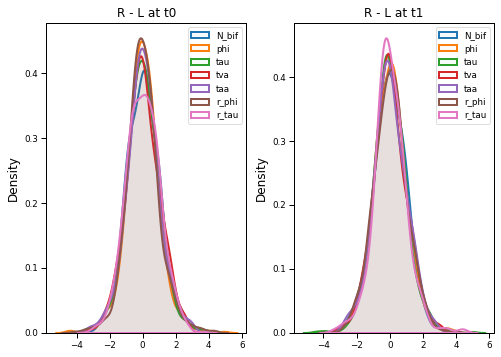

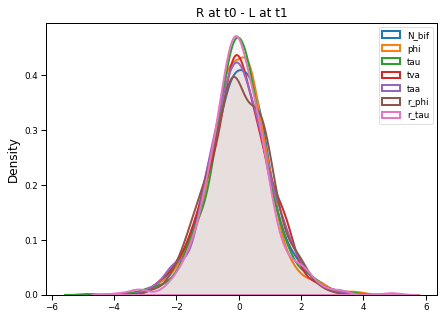

In [256]:
df_N_bif_right, df_medianDiameter_all_right, df_DF_all_right, df_tVA_right, df_tAA_right,df_D_ratio_right,df_DF_ratio_right = rename_R_L(df_N_bif_right, df_medianDiameter_all_right, df_DF_all_right, df_tVA_right, df_tAA_right,df_D_ratio_right,df_DF_ratio_right, 'R')
df_N_bif_left, df_medianDiameter_all_left, df_DF_all_left, df_tVA_left, df_tAA_left,df_D_ratio_left,df_DF_ratio_left = rename_R_L(df_N_bif_left, df_medianDiameter_all_left, df_DF_all_left, df_tVA_left, df_tAA_left,df_D_ratio_left,df_DF_ratio_left, 'L')

list_R = [df_N_bif_right, df_medianDiameter_all_right, df_DF_all_right, df_tVA_right, df_tAA_right,df_D_ratio_right,df_DF_ratio_right]
list_L = [df_N_bif_left, df_medianDiameter_all_left, df_DF_all_left, df_tVA_left, df_tAA_left,df_D_ratio_left,df_DF_ratio_left]
list_names = ['bifurcations', 'medianDiameter_all', 'DF_all', 'mean_angle_tva', 'mean_angle_taa', 'ratio_AV_medianDiameter', 'ratio_AV_DF']
list_first_value = ['_00_R', '_10_R', '_00_R']
list_second_value = ['_00_L', '_10_L', '_10_L']

intersections = {}
substractions_00 = {}
substractions_10 = {}
substractions_mix = {}
plot_dict_00 = {}
plot_dict_10 = {}
plot_dict_mix = {}
# if len(list_names)!=len(list_R)!=len(list_L) => error

for i in range(len(list_R)):
    intersections[f'df_intersection_{list_names[i]}'] = intersection_R_L(list_R[i], list_L[i])
    substractions_00[f'df_00_{list_names[i]}'] = compute_substraction(intersections[f'df_intersection_{list_names[i]}'], list_first_value[0], list_second_value[0], list_names[i])
    substractions_10[f'df_10_{list_names[i]}'] = compute_substraction(intersections[f'df_intersection_{list_names[i]}'], list_first_value[1], list_second_value[1], list_names[i])
    substractions_mix[f'df_mix_{list_names[i]}'] = compute_substraction(intersections[f'df_intersection_{list_names[i]}'], list_first_value[2], list_second_value[2], list_names[i])

plot_dict_00 = prepare_data_for_plot_RL(substractions_00, 'df_00_', list_names)
plot_dict_10 = prepare_data_for_plot_RL(substractions_10, 'df_10_', list_names)
plot_dict_mix = prepare_data_for_plot_RL(substractions_mix, 'df_mix_', list_names)

plot_density_time_dif(plot_dict_00, plot_dict_10, plot_dict_mix)